In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sts

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, auc, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import class_weight, resample
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier



from scipy import stats
from prettytable import PrettyTable




# Our Scientific Questioning

Thanks to the information received by the website https://bigcitieshealthdata.org, we aim to predict the type of death thanks to data such as the place of living, gender or details about the environment of a person. 

# 1. Data Gathering

In [30]:
data = pd.read_csv('BigCitiesHealth.csv')

In [31]:
data

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
0,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Dallas,TX,"Dallas, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Male,Hispanic Male
1,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Fort Worth,TX,"Fort Worth, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Male,Asian/PI Male
2,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Antonio,TX,"San Antonio, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male,White Male
3,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Chicago,IL,"Chicago, IL",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Male,Hispanic Male
4,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Kansas City,MO,"Kansas City, MO",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Male,Hispanic Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148287,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,New York City,NY,"New York City, NY",...,NaN,NaN,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148288,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148289,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Houston,TX,"Houston, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN
148290,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://

In [32]:
data['metric_item_label'].unique()

array(['COVID-19 Deaths', 'Diabetes Deaths', 'Walking to Work',
       'Deaths from All Causes', 'Life Expectancy', 'Uninsured, All Ages',
       'Uninsured, Child', 'Dental Care', 'Prenatal Care',
       'People with Disabilities', 'Teen Asthma', 'All Cancer Deaths',
       'Breast Cancer Deaths', 'Lung Cancer Deaths',
       'Cardiovascular Disease Deaths', 'Heart Disease Deaths',
       'High Blood Pressure', 'Diabetes', 'Adult Obesity', 'Teen Obesity',
       'Adult Physical Inactivity', 'Teen Physical Activity Levels',
       'Teen Physical Inactivity', 'Teen Physical Education',
       'Teen Computer Time', 'Teen TV Time', 'Teen Soda',
       'Teen Breakfast', 'Flu Vaccinations, Medicare',
       'Pneumonia or Influenza Deaths', 'New Tuberculosis Cases',
       'HIV-Related Deaths', 'HIV/AIDS Prevalence', 'New Chlamydia Cases',
       'Syphilis Prevalence', 'Syphilis, Newborns', 'New Gonorrhea Cases',
       'Maternal Deaths', 'Infant Deaths', 'Low Birthweight',
       'Teen Birt

Get data information such as data types, shape etc.

In [33]:
data.shape

(148292, 31)

In [34]:
data.dtypes

metric_item_label                   object
metric_cat_label                    object
metric_subcat_label                 object
metric_item_label_subtitle          object
metric_cat_item_yaxis_label         object
metric_source_desc_label_fn         object
metric_source_desc_label_url_fn     object
geo_label_city                      object
geo_label_state                     object
geo_label_citystate                 object
geo_fips_code                      float64
value                              float64
date_label                           int64
geo_label_proxy_or_real             object
geo_label_proxy_footnote            object
geo_fips_desc                       object
date_label_proxy_or_real            object
date_label_proxy_footnote           object
value_ci_flag_yesno                 object
value_95_ci_low                    float64
value_95_ci_high                   float64
value_90_ci_low                    float64
value_90_ci_high                   float64
geo_strata_

# 2. Data PreProcessing

We can see the different types of deaths possible from our data

In [35]:
death_rows = data[data['metric_item_label'].str.contains('Death', case=False)]
death_rows['metric_item_label'].value_counts()

Premature Death                  5775
Deaths from All Causes           5371
All Cancer Deaths                5321
Cardiovascular Disease Deaths    5314
Heart Disease Deaths             5256
Injury Deaths                    5173
Diabetes Deaths                  4620
Lung Cancer Deaths               4616
Drug Overdose Deaths             4553
Motor Vehicle Deaths             4313
Pneumonia or Influenza Deaths    4105
Firearm Deaths                   4092
Opioid Overdose Deaths           3932
HIV-Related Deaths               2883
Breast Cancer Deaths             1506
Infant Deaths                    1152
Maternal Deaths                   770
COVID-19 Deaths                   484
Name: metric_item_label, dtype: int64

So we will only keep the rows that interest us which are the rows where there is 'death' in the metric_subcat_label column

In [36]:
data_death_only = data[data['metric_item_label'].str.contains('Death', case=False)]
data_death_only

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
0,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Dallas,TX,"Dallas, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Male,Hispanic Male
1,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Fort Worth,TX,"Fort Worth, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Male,Asian/PI Male
2,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Antonio,TX,"San Antonio, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male,White Male
3,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Chicago,IL,"Chicago, IL",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Male,Hispanic Male
4,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Kansas City,MO,"Kansas City, MO",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Male,Hispanic Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148287,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,New York City,NY,"New York City, NY",...,NaN,NaN,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148288,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148289,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Houston,TX,"Houston, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN
148290,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://

In [37]:
data_death_only = data_death_only[~data_death_only['metric_item_label'].str.contains('Deaths from All Causes', case=False)]
data_death_only = data_death_only[~data_death_only['metric_item_label'].str.contains('All Cancer Deaths', case=False)]
data_death_only = data_death_only[~data_death_only['metric_item_label'].str.contains('Premature Death', case=False)]
data_death_only

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
0,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Dallas,TX,"Dallas, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Male,Hispanic Male
1,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Fort Worth,TX,"Fort Worth, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Male,Asian/PI Male
2,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Antonio,TX,"San Antonio, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male,White Male
3,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Chicago,IL,"Chicago, IL",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Male,Hispanic Male
4,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Kansas City,MO,"Kansas City, MO",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Male,Hispanic Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100939,Motor Vehicle Deaths,Violence and Injury,Deaths,Deaths related to motor vehicles crashes (per ...,"Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Philadelphia,PA,"Philadelphia, PA",...,NaN,NaN,Northeast,Poorest cities (20%+ poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),White,Both,NaN
100940,Motor Vehicle Deaths,Violence and Injury,Deaths,Deaths related to motor vehicles crashes (per ...,"Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Oklahoma City,OK,"Oklahoma City, OK",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both,NaN
100941,Motor Vehicle Deaths,Violence and Injury,Deaths,Deaths related to motor vehicles crashes (per ...,"Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Oakland,CA,"Oakland, CA",...,NaN,NaN,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both,NaN
100942,Motor Vehicle Deaths,Violence and Injury,Deaths,Deaths related to motor vehicles crashes (per ...,"Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,New York City,NY,"New York City, NY",...,NaN,NaN,Northeast,Less poor cities (<20% poor),La

In [38]:
data_death_only['metric_item_label'].unique()

array(['COVID-19 Deaths', 'Diabetes Deaths', 'Breast Cancer Deaths',
       'Lung Cancer Deaths', 'Cardiovascular Disease Deaths',
       'Heart Disease Deaths', 'Pneumonia or Influenza Deaths',
       'HIV-Related Deaths', 'Maternal Deaths', 'Infant Deaths',
       'Opioid Overdose Deaths', 'Drug Overdose Deaths', 'Injury Deaths',
       'Firearm Deaths', 'Motor Vehicle Deaths'], dtype=object)

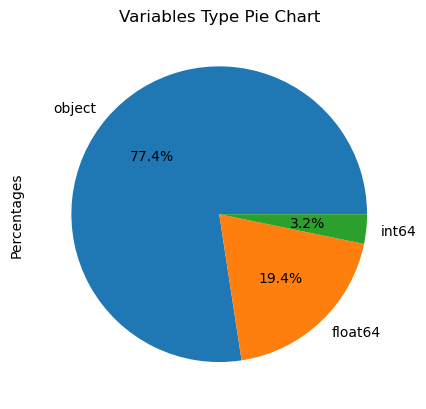

In [39]:

data_types_counts = data_death_only.dtypes.value_counts()
data_types_fig = data_types_counts.plot.pie(autopct='%1.1f%%')

data_types_fig.set_ylabel('Percentages')
t = data_types_fig.set(title="Variables Type Pie Chart")


In this step, the goal is to drop non-relevant columns or rows, in order to get a clean and non-missing item data.

In [40]:
plot_missing = data_death_only.isnull().sum()
plot_missing

metric_item_label                      0
metric_cat_label                       0
metric_subcat_label                    0
metric_item_label_subtitle             0
metric_cat_item_yaxis_label            0
metric_source_desc_label_fn            0
metric_source_desc_label_url_fn        0
geo_label_city                         0
geo_label_state                      151
geo_label_citystate                    0
geo_fips_code                        151
value                                  0
date_label                             0
geo_label_proxy_or_real                0
geo_label_proxy_footnote           49700
geo_fips_desc                          0
date_label_proxy_or_real               0
date_label_proxy_footnote          52769
value_ci_flag_yesno                    0
value_95_ci_low                      151
value_95_ci_high                     151
value_90_ci_low                    52769
value_90_ci_high                   52769
geo_strata_region                    151
geo_strata_pover

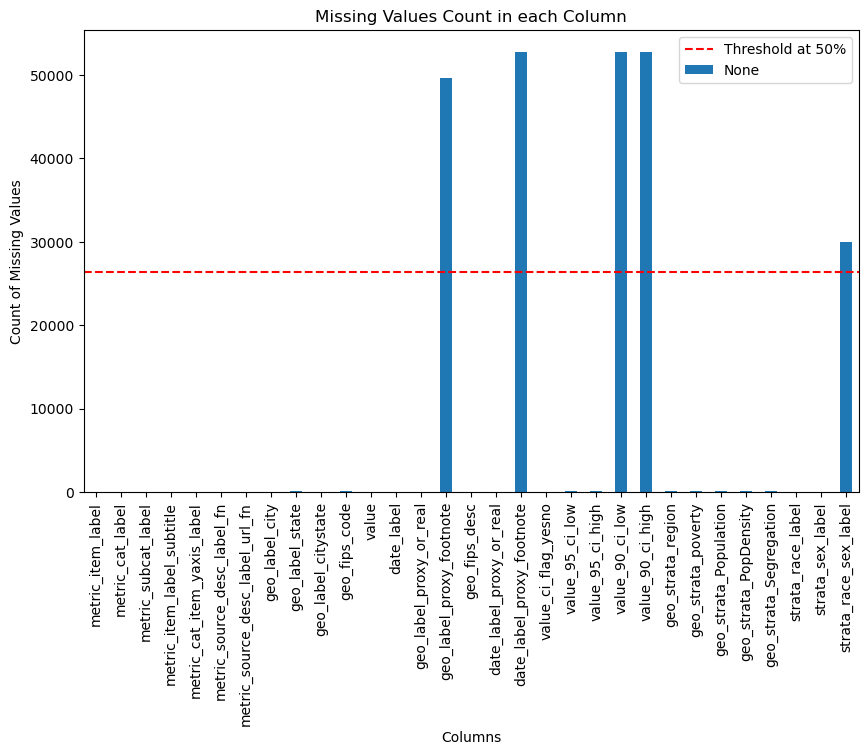

In [41]:
plt.figure(figsize=(10, 6))
plot_missing.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values Count in each Column')

threshold = plot_missing.max() * 0.5
plt.axhline(threshold, color='r', linestyle='--', label='Threshold at 50%')


plt.legend()

Dropping data from rows with a too high amount of missing values (more than 50% of data length)

In [42]:
data_death_only = data_death_only.dropna(thresh=threshold, axis=1)

In [43]:
len(data_death_only)

52769

In [44]:
data_death_only.isnull().sum()

metric_item_label                    0
metric_cat_label                     0
metric_subcat_label                  0
metric_item_label_subtitle           0
metric_cat_item_yaxis_label          0
metric_source_desc_label_fn          0
metric_source_desc_label_url_fn      0
geo_label_city                       0
geo_label_state                    151
geo_label_citystate                  0
geo_fips_code                      151
value                                0
date_label                           0
geo_label_proxy_or_real              0
geo_fips_desc                        0
date_label_proxy_or_real             0
value_ci_flag_yesno                  0
value_95_ci_low                    151
value_95_ci_high                   151
geo_strata_region                  151
geo_strata_poverty                 151
geo_strata_Population              151
geo_strata_PopDensity              151
geo_strata_Segregation             151
strata_race_label                    0
strata_sex_label         

There seem to be several columns with the same missing rows, so it makes sense to suppress them

In [45]:
data_death_only = data_death_only.dropna(subset=['geo_label_state'])
data_death_only.isnull().sum()

metric_item_label                  0
metric_cat_label                   0
metric_subcat_label                0
metric_item_label_subtitle         0
metric_cat_item_yaxis_label        0
metric_source_desc_label_fn        0
metric_source_desc_label_url_fn    0
geo_label_city                     0
geo_label_state                    0
geo_label_citystate                0
geo_fips_code                      0
value                              0
date_label                         0
geo_label_proxy_or_real            0
geo_fips_desc                      0
date_label_proxy_or_real           0
value_ci_flag_yesno                0
value_95_ci_low                    0
value_95_ci_high                   0
geo_strata_region                  0
geo_strata_poverty                 0
geo_strata_Population              0
geo_strata_PopDensity              0
geo_strata_Segregation             0
strata_race_label                  0
strata_sex_label                   0
dtype: int64

No more missing values! Now lets look at our data. Are there still columns that we don't need? 

In [46]:
data_death_only

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_ci_flag_yesno,value_95_ci_low,value_95_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label
0,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Dallas,TX,"Dallas, TX",...,yes,240.233095,307.293299,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Male
1,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Fort Worth,TX,"Fort Worth, TX",...,yes,161.906352,629.881493,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Male
2,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Antonio,TX,"San Antonio, TX",...,yes,73.839052,98.550579,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male
3,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Chicago,IL,"Chicago, IL",...,yes,328.986597,382.175123,Midwest,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Male
4,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Kansas City,MO,"Kansas City, MO",...,yes,104.928717,316.971329,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100939,Motor Vehicle Deaths,Violence and Injury,Deaths,Deaths related to motor vehicles crashes (per ...,"Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Philadelphia,PA,"Philadelphia, PA",...,yes,5.968493,8.675998,Northeast,Poorest cities (20%+ poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),White,Both
100940,Motor Vehicle Deaths,Violence and Injury,Deaths,Deaths related to motor vehicles crashes (per ...,"Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Oklahoma City,OK,"Oklahoma City, OK",...,yes,11.074642,15.784415,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
100941,Motor Vehicle Deaths,Violence and Injury,Deaths,Deaths related to motor vehicles crashes (per ...,"Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Oakland,CA,"Oakland, CA",...,yes,2.417217,7.733750,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
100942,Motor Vehicle Deaths,Violence and Injury,Deaths,Deaths related to motor vehicles crashes (per ...,"Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,New York City,NY,"New York City, NY",..

In [47]:
data_death_only['metric_item_label'].unique()

array(['COVID-19 Deaths', 'Diabetes Deaths', 'Breast Cancer Deaths',
       'Lung Cancer Deaths', 'Cardiovascular Disease Deaths',
       'Heart Disease Deaths', 'Pneumonia or Influenza Deaths',
       'HIV-Related Deaths', 'Maternal Deaths', 'Infant Deaths',
       'Opioid Overdose Deaths', 'Drug Overdose Deaths', 'Injury Deaths',
       'Firearm Deaths', 'Motor Vehicle Deaths'], dtype=object)

In [48]:
data_death_only = data_death_only.drop(['metric_source_desc_label_fn', 'metric_source_desc_label_url_fn', 'geo_label_citystate'], axis=1)

Our data seems clear now! 

In [49]:
data_death_only

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,geo_label_city,geo_label_state,geo_fips_code,value,date_label,...,value_ci_flag_yesno,value_95_ci_low,value_95_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label
0,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000",Dallas,TX,4819000.0,271.876868,2020,...,yes,240.233095,307.293299,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Male
1,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000",Fort Worth,TX,4827000.0,333.954685,2020,...,yes,161.906352,629.881493,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Male
2,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000",San Antonio,TX,4865000.0,85.391551,2020,...,yes,73.839052,98.550579,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male
3,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000",Chicago,IL,1714000.0,354.585206,2020,...,yes,328.986597,382.175123,Midwest,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Male
4,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000",Kansas City,MO,2938000.0,187.017704,2020,...,yes,104.928717,316.971329,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100939,Motor Vehicle Deaths,Violence and Injury,Deaths,Deaths related to motor vehicles crashes (per ...,"Per 100,000",Philadelphia,PA,4260000.0,7.192116,2012,...,yes,5.968493,8.675998,Northeast,Poorest cities (20%+ poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),White,Both
100940,Motor Vehicle Deaths,Violence and Injury,Deaths,Deaths related to motor vehicles crashes (per ...,"Per 100,000",Oklahoma City,OK,4055000.0,13.242553,2012,...,yes,11.074642,15.784415,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
100941,Motor Vehicle Deaths,Violence and Injury,Deaths,Deaths related to motor vehicles crashes (per ...,"Per 100,000",Oakland,CA,653000.0,4.430112,2012,...,yes,2.417217,7.733750,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
100942,Motor Vehicle Deaths,Violence and Injury,Deaths,Deaths related to motor vehicles crashes (per ...,"Per 100,000",New York City,NY,3651000.0,3.864187,2012,...,yes,3.455505,4.319625,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),White,Both


In [50]:
data = data_death_only 

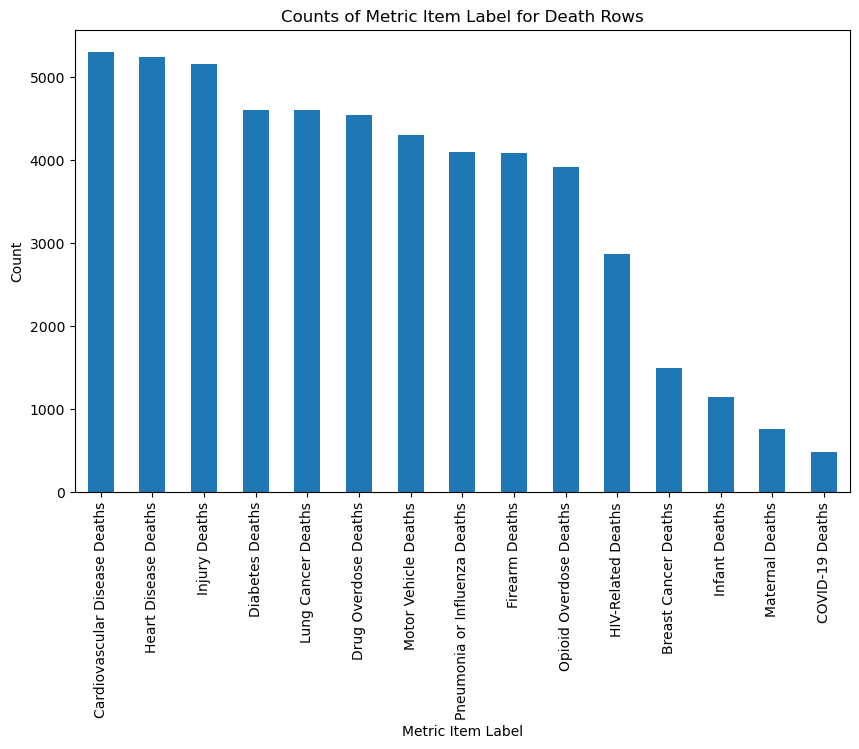

In [51]:
plot_dead = data['metric_item_label'].value_counts()
plt.figure(figsize=(10, 6))
plot_dead.plot(kind='bar')
plt.xlabel('Metric Item Label')
plt.ylabel('Count')
plt.title('Counts of Metric Item Label for Death Rows')
plt.show()

# 3. Exploratory Data Analysis

We want to visualize and find relationships between the metrics using statistical methods. 

Drop also the labels that we don't need anymore or that only have one type of input

In [52]:
data = data.drop(['metric_subcat_label', 'value_ci_flag_yesno', 'geo_fips_desc', 'date_label_proxy_or_real'], axis = 1)

In [53]:
data

,metric_item_label,metric_cat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,geo_label_city,geo_label_state,geo_fips_code,value,date_label,geo_label_proxy_or_real,value_95_ci_low,value_95_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label
0,COVID-19 Deaths,Infectious Diseases,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000",Dallas,TX,4819000.0,271.876868,2020,real,240.233095,307.293299,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Male
1,COVID-19 Deaths,Infectious Diseases,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000",Fort Worth,TX,4827000.0,333.954685,2020,real,161.906352,629.881493,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Male
2,COVID-19 Deaths,Infectious Diseases,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000",San Antonio,TX,4865000.0,85.391551,2020,real,73.839052,98.550579,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male
3,COVID-19 Deaths,Infectious Diseases,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000",Chicago,IL,1714000.0,354.585206,2020,real,328.986597,382.175123,Midwest,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Male
4,COVID-19 Deaths,Infectious Diseases,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000",Kansas City,MO,2938000.0,187.017704,2020,real,104.928717,316.971329,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100939,Motor Vehicle Deaths,Violence and Injury,Deaths related to motor vehicles crashes (per ...,"Per 100,000",Philadelphia,PA,4260000.0,7.192116,2012,real,5.968493,8.675998,Northeast,Poorest cities (20%+ poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),White,Both
100940,Motor Vehicle Deaths,Violence and Injury,Deaths related to motor vehicles crashes (per ...,"Per 100,000",Oklahoma City,OK,4055000.0,13.242553,2012,real,11.074642,15.784415,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
100941,Motor Vehicle Deaths,Violence and Injury,Deaths related to motor vehicles crashes (per ...,"Per 100,000",Oakland,CA,653000.0,4.430112,2012,real,2.417217,7.733750,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
100942,Motor Vehicle Deaths,Violence and Injury,Deaths related to motor vehicles crashes (per ...,"Per 100,000",New York City,NY,3651000.0,3.864187,2012,real,3.455505,4.319625,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),White,Both


We can divide the geo_fips_code by 1'000 to get realistic values

In [54]:
data['geo_fips_code'] = data['geo_fips_code'] / 1000

Firstly, divide all value, metric_cat_item_yaxis_label and value_95_ci_high such as they are on the same level

Values with metric_cat_item_yaxis_label = Per 1,000 -> Divide them by 1'000

Values with metric_cat_item_yaxis_label = Per 100'000 -> Divide them by 1'000

In [55]:
columns_to_divide = ['value', 'value_95_ci_low', 'value_95_ci_high']

find_1000 = data['metric_cat_item_yaxis_label'] == 'Per 1,000'
data.loc[find_1000, columns_to_divide] /= 1000

find_100000_women = data['metric_cat_item_yaxis_label'] == 'Per 100,000 females'
data.loc[find_100000_women, columns_to_divide] /= 100000

find_100000 = data['metric_cat_item_yaxis_label'] == 'Per 100,000'
data.loc[find_100000, columns_to_divide] /= 100000

After the presentation, we noticed that it would make sense to delete these two features too.

In [56]:
data = data.drop(['metric_cat_item_yaxis_label', 'metric_item_label_subtitle'], axis = 1)
data

,metric_item_label,metric_cat_label,geo_label_city,geo_label_state,geo_fips_code,value,date_label,geo_label_proxy_or_real,value_95_ci_low,value_95_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label
0,COVID-19 Deaths,Infectious Diseases,Dallas,TX,4819.0,0.002719,2020,real,0.002402,0.003073,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Male
1,COVID-19 Deaths,Infectious Diseases,Fort Worth,TX,4827.0,0.003340,2020,real,0.001619,0.006299,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Male
2,COVID-19 Deaths,Infectious Diseases,San Antonio,TX,4865.0,0.000854,2020,real,0.000738,0.000986,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male
3,COVID-19 Deaths,Infectious Diseases,Chicago,IL,1714.0,0.003546,2020,real,0.003290,0.003822,Midwest,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Male
4,COVID-19 Deaths,Infectious Diseases,Kansas City,MO,2938.0,0.001870,2020,real,0.001049,0.003170,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100939,Motor Vehicle Deaths,Violence and Injury,Philadelphia,PA,4260.0,0.000072,2012,real,0.000060,0.000087,Northeast,Poorest cities (20%+ poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),White,Both
100940,Motor Vehicle Deaths,Violence and Injury,Oklahoma City,OK,4055.0,0.000132,2012,real,0.000111,0.000158,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
100941,Motor Vehicle Deaths,Violence and Injury,Oakland,CA,653.0,0.000044,2012,real,0.000024,0.000077,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
100942,Motor Vehicle Deaths,Violence and Injury,New York City,NY,3651.0,0.000039,2012,real,0.000035,0.000043,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),White,Both


We are now down to 17 columns

If we want to get back to the original data

In [57]:
original_data = pd.DataFrame(data)
original_data.to_csv('original_data.csv', index=False)


We have some binary columns, lets transform them to bools

In [58]:
data.nunique()

metric_item_label             15
metric_cat_label               5
geo_label_city                35
geo_label_state               23
geo_fips_code                 35
value                      51919
date_label                    11
geo_label_proxy_or_real        2
value_95_ci_low            51919
value_95_ci_high           51919
geo_strata_region              4
geo_strata_poverty             2
geo_strata_Population          2
geo_strata_PopDensity          2
geo_strata_Segregation         2
strata_race_label              5
strata_sex_label               3
dtype: int64

In [59]:
data

,metric_item_label,metric_cat_label,geo_label_city,geo_label_state,geo_fips_code,value,date_label,geo_label_proxy_or_real,value_95_ci_low,value_95_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label
0,COVID-19 Deaths,Infectious Diseases,Dallas,TX,4819.0,0.002719,2020,real,0.002402,0.003073,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Male
1,COVID-19 Deaths,Infectious Diseases,Fort Worth,TX,4827.0,0.003340,2020,real,0.001619,0.006299,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Male
2,COVID-19 Deaths,Infectious Diseases,San Antonio,TX,4865.0,0.000854,2020,real,0.000738,0.000986,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male
3,COVID-19 Deaths,Infectious Diseases,Chicago,IL,1714.0,0.003546,2020,real,0.003290,0.003822,Midwest,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Male
4,COVID-19 Deaths,Infectious Diseases,Kansas City,MO,2938.0,0.001870,2020,real,0.001049,0.003170,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100939,Motor Vehicle Deaths,Violence and Injury,Philadelphia,PA,4260.0,0.000072,2012,real,0.000060,0.000087,Northeast,Poorest cities (20%+ poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),White,Both
100940,Motor Vehicle Deaths,Violence and Injury,Oklahoma City,OK,4055.0,0.000132,2012,real,0.000111,0.000158,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
100941,Motor Vehicle Deaths,Violence and Injury,Oakland,CA,653.0,0.000044,2012,real,0.000024,0.000077,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
100942,Motor Vehicle Deaths,Violence and Injury,New York City,NY,3651.0,0.000039,2012,real,0.000035,0.000043,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),White,Both


Do label encoding for geo_label_city, geo_label_state

In [61]:
encoding_columns = ['metric_item_label', 'metric_cat_label',
                    'geo_label_city', 'geo_label_city', 'geo_label_state', 'geo_label_state',
                    'geo_strata_region', 'strata_race_label', 'strata_sex_label', 'geo_strata_poverty', 'geo_strata_Population', 
                    'geo_strata_PopDensity', 'geo_strata_Segregation', 'geo_label_proxy_or_real']
label_encoder = LabelEncoder()
label_mapping = {}

for column in encoding_columns:
    data[column] = label_encoder.fit_transform(data[column])
    label_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

table = PrettyTable()
table.field_names = ["Column", "Encoded Label", "Original Value"]

for column, mapping in label_mapping.items():
    for encoded_label, original_value in mapping.items():
        table.add_row([column, encoded_label, original_value])

table

Column,Encoded Label,Original Value
metric_item_label,0,0
metric_item_label,1,1
metric_item_label,2,2
metric_item_label,3,3
metric_item_label,4,4
metric_item_label,5,5
metric_item_label,6,6
metric_item_label,7,7
metric_item_label,8,8
metric_item_label,9,9


In [62]:
data

,metric_item_label,metric_cat_label,geo_label_city,geo_label_state,geo_fips_code,value,date_label,geo_label_proxy_or_real,value_95_ci_low,value_95_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label
0,1,1,7,20,4819.0,0.002719,2020,1,0.002402,0.003073,2,0,0,1,0,3,2
1,1,1,11,20,4827.0,0.003340,2020,1,0.001619,0.006299,2,0,1,1,1,1,2
2,1,1,28,20,4865.0,0.000854,2020,1,0.000738,0.000986,2,0,0,1,1,4,2
3,1,1,4,4,1714.0,0.003546,2020,1,0.003290,0.003822,0,0,0,0,0,3,2
4,1,1,14,11,2938.0,0.001870,2020,1,0.001049,0.003170,0,0,1,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100939,12,4,25,18,4260.0,0.000072,2012,1,0.000060,0.000087,1,1,0,0,0,4,0
100940,12,4,24,16,4055.0,0.000132,2012,1,0.000111,0.000158,2,0,1,1,1,4,0
100941,12,4,23,1,653.0,0.000044,2012,1,0.000024,0.000077,3,0,1,1,1,4,0
100942,12,4,22,14,3651.0,0.000039,2012,1,0.000035,0.000043,1,0,0,0,0,4,0


Transform all to float, whis will be easier for later processing

In [63]:
data = data.astype(float)

Our data is now fully numerical and we can work with this. 

### Visualization of Frequency

In [64]:
original_data = pd.read_csv('original_data.csv')

In [65]:
original_data

,metric_item_label,metric_cat_label,geo_label_city,geo_label_state,geo_fips_code,value,date_label,geo_label_proxy_or_real,value_95_ci_low,value_95_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label
0,COVID-19 Deaths,Infectious Diseases,Dallas,TX,4819.0,0.002719,2020,real,0.002402,0.003073,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Male
1,COVID-19 Deaths,Infectious Diseases,Fort Worth,TX,4827.0,0.003340,2020,real,0.001619,0.006299,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Male
2,COVID-19 Deaths,Infectious Diseases,San Antonio,TX,4865.0,0.000854,2020,real,0.000738,0.000986,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male
3,COVID-19 Deaths,Infectious Diseases,Chicago,IL,1714.0,0.003546,2020,real,0.003290,0.003822,Midwest,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Male
4,COVID-19 Deaths,Infectious Diseases,Kansas City,MO,2938.0,0.001870,2020,real,0.001049,0.003170,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52613,Motor Vehicle Deaths,Violence and Injury,Philadelphia,PA,4260.0,0.000072,2012,real,0.000060,0.000087,Northeast,Poorest cities (20%+ poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),White,Both
52614,Motor Vehicle Deaths,Violence and Injury,Oklahoma City,OK,4055.0,0.000132,2012,real,0.000111,0.000158,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
52615,Motor Vehicle Deaths,Violence and Injury,Oakland,CA,653.0,0.000044,2012,real,0.000024,0.000077,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
52616,Motor Vehicle Deaths,Violence and Injury,New York City,NY,3651.0,0.000039,2012,real,0.000035,0.000043,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),White,Both


IndexError: index 13 is out of bounds for axis 0 with size 13

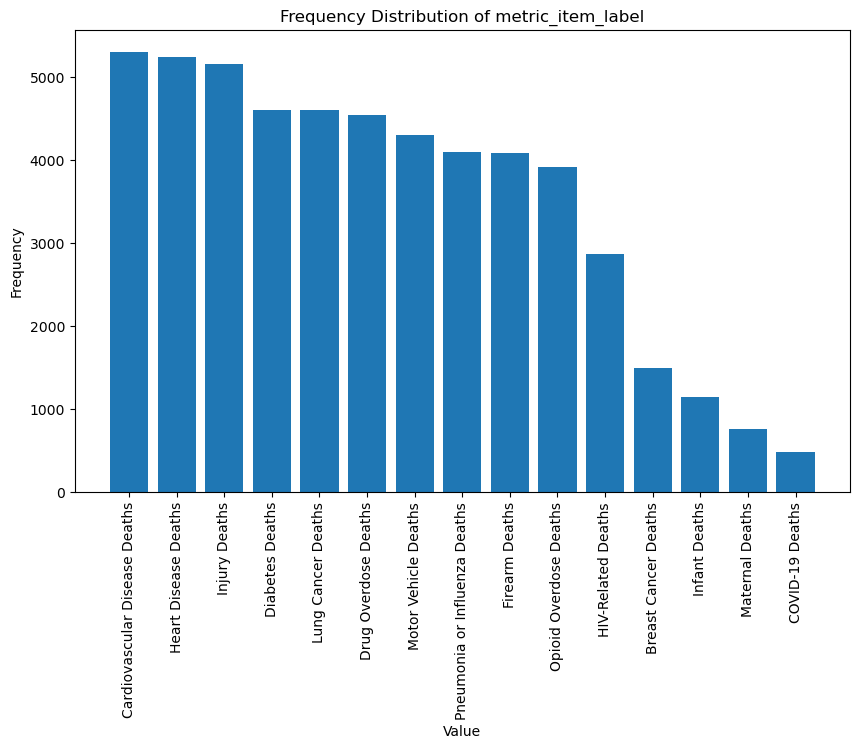

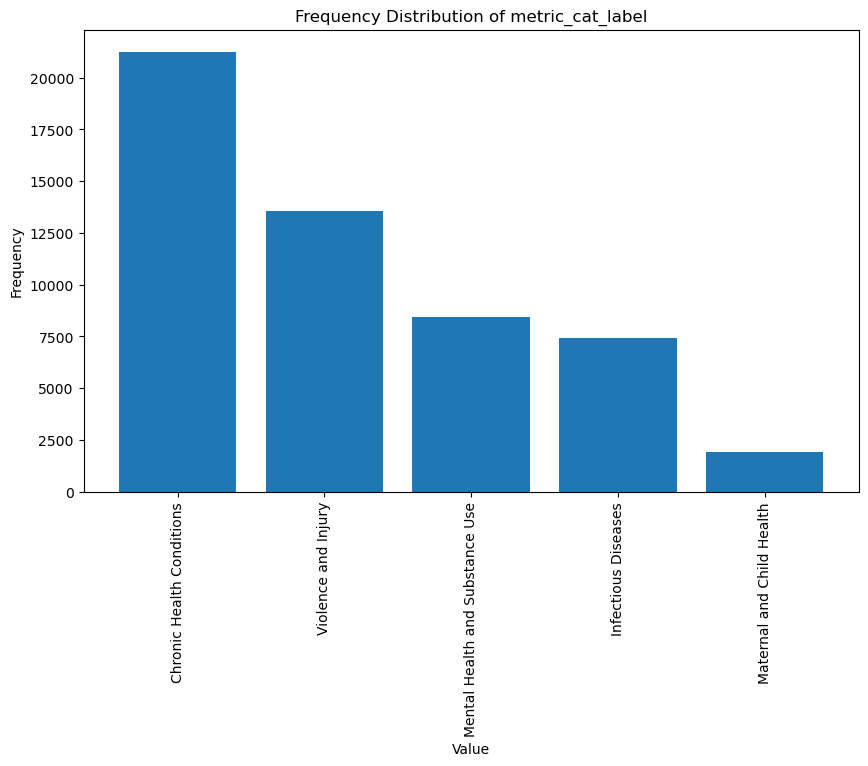

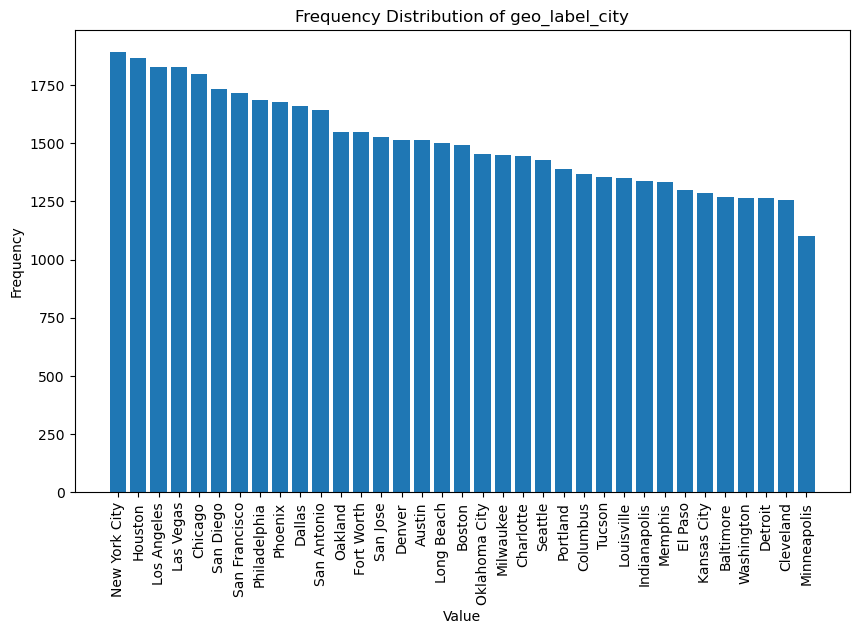

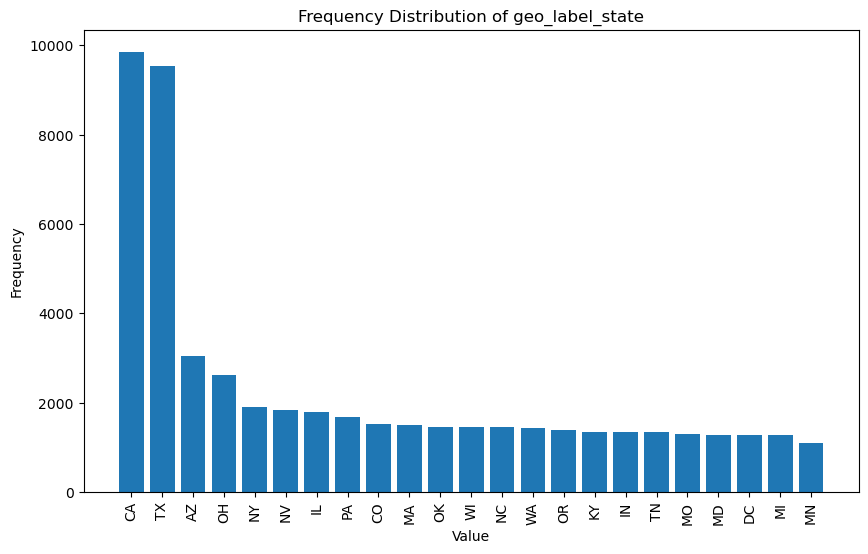

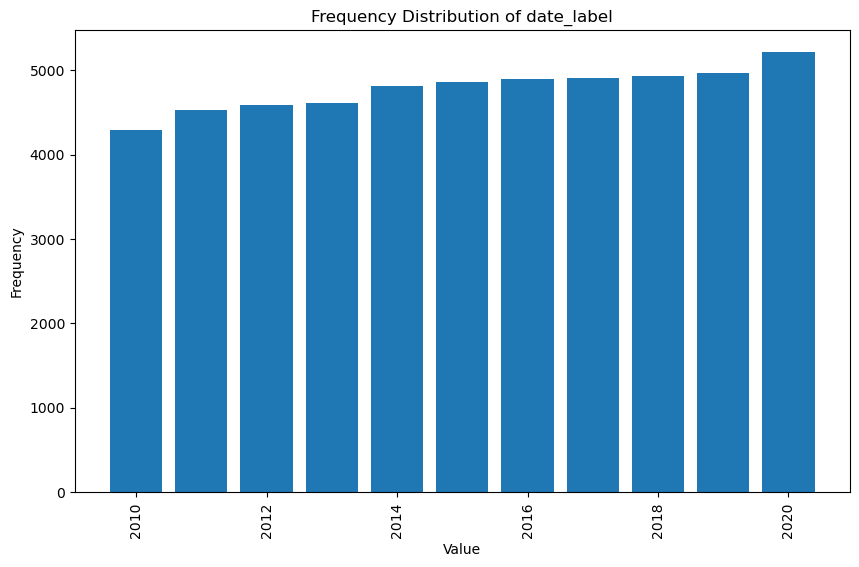

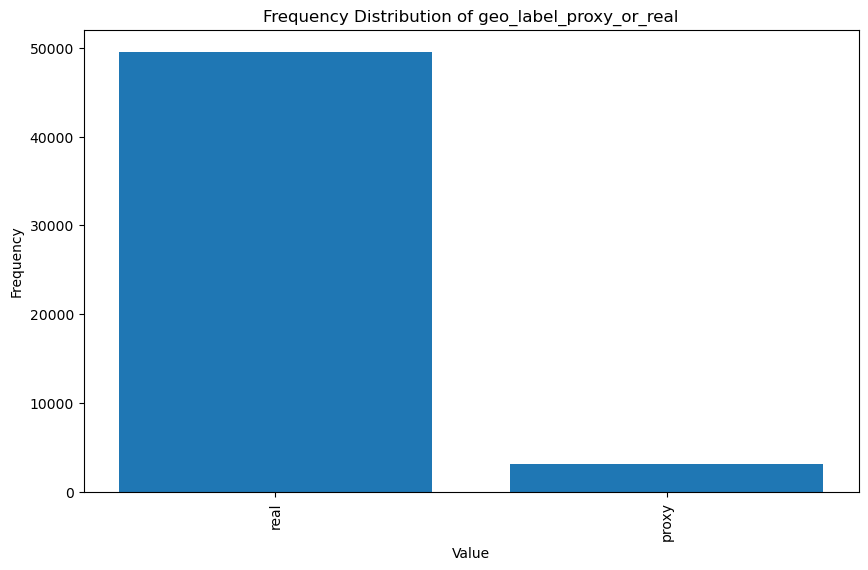

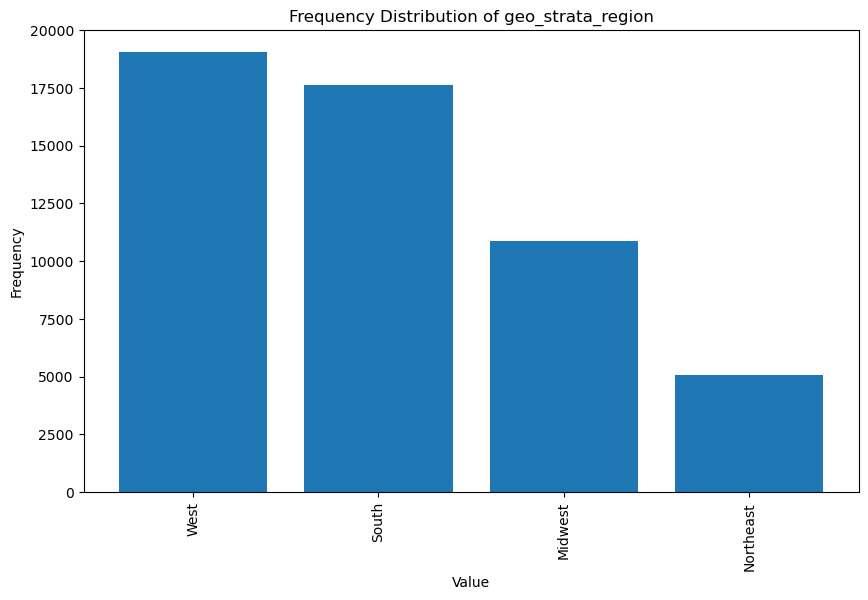

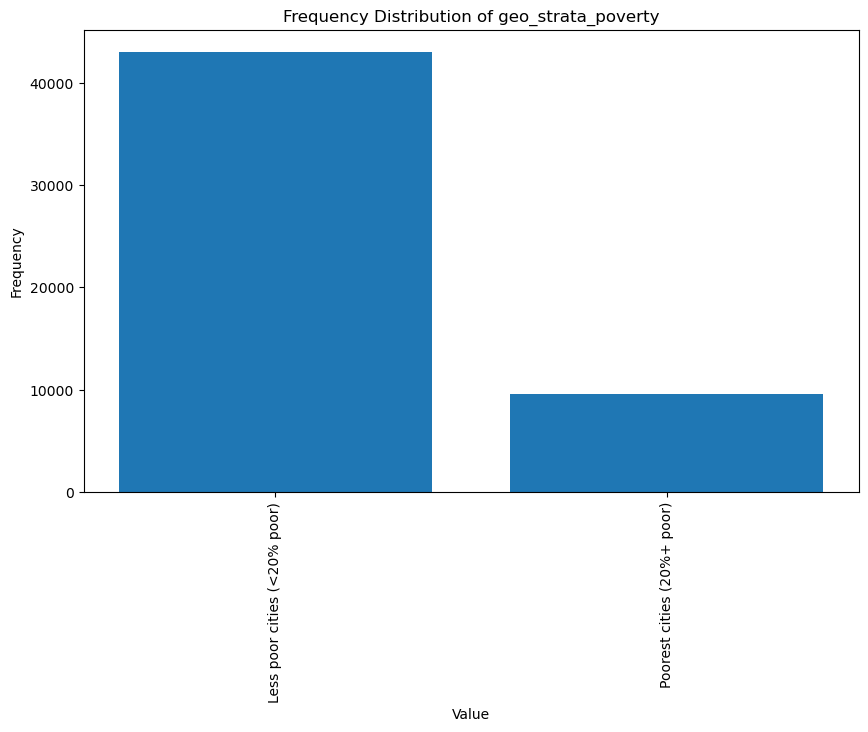

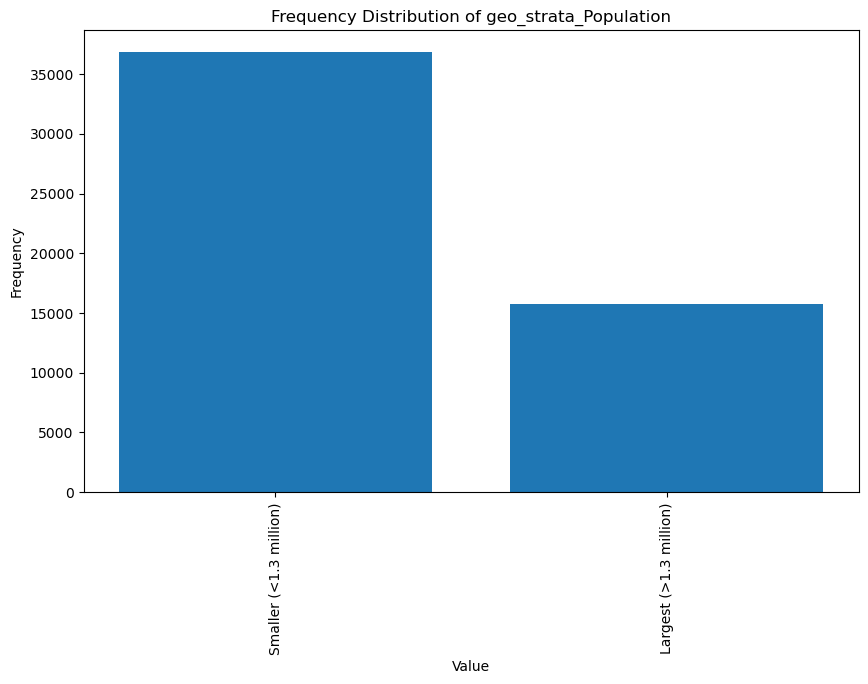

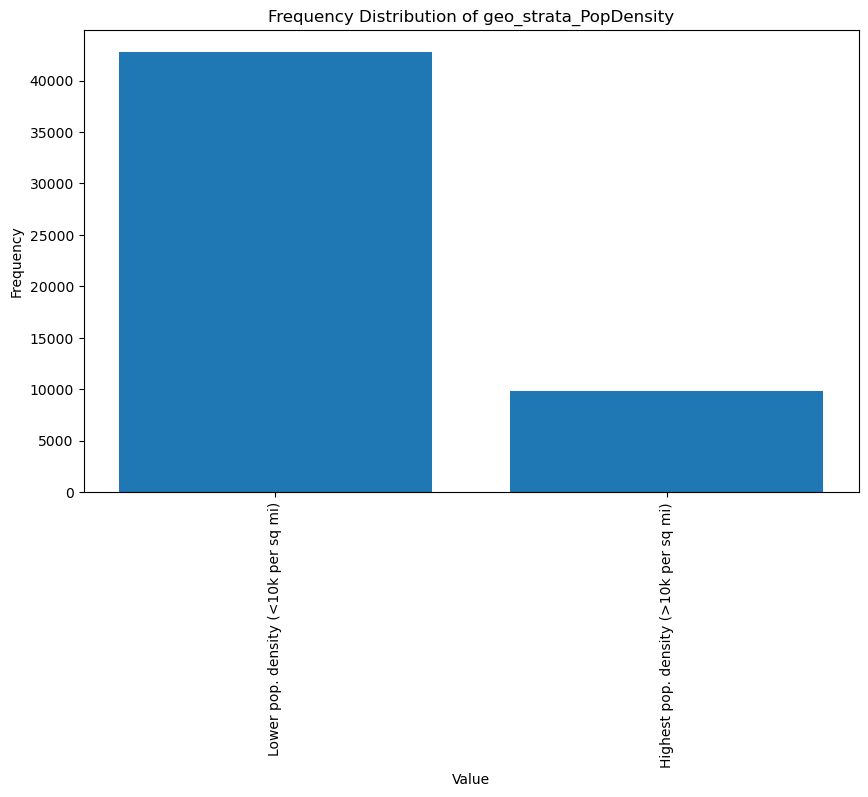

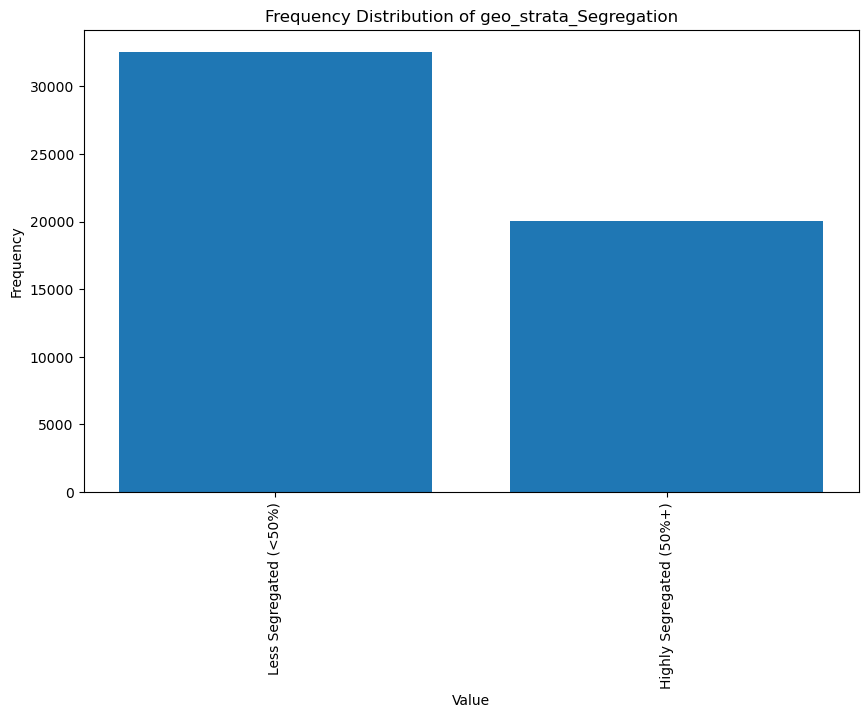

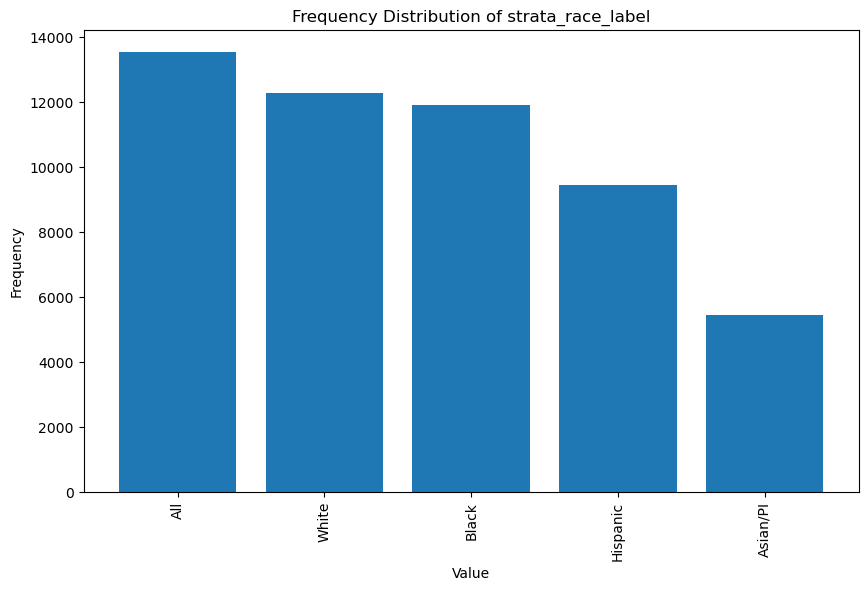

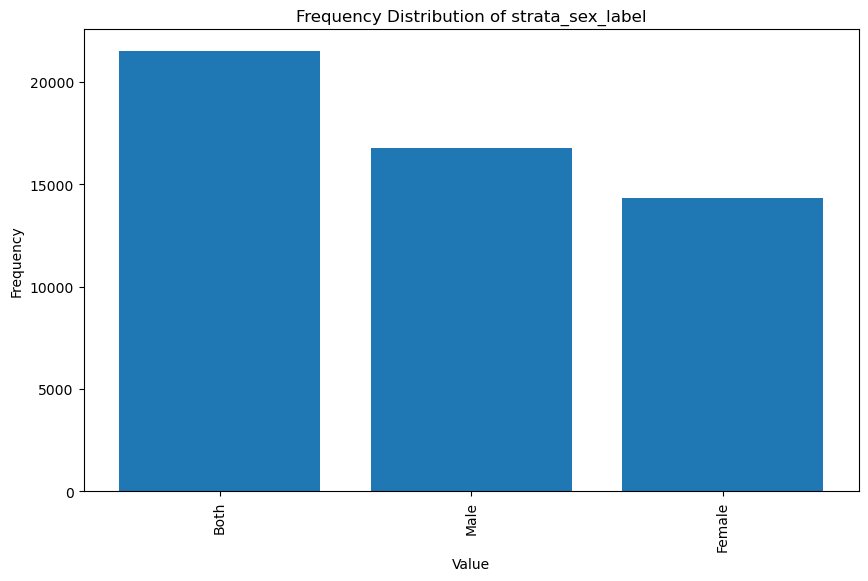

In [66]:
plot_columns = original_data.drop(['geo_fips_code', 'value', 'value_95_ci_low', 'value_95_ci_high'], axis=1)

for i in range(15):
    column = plot_columns.columns[i]
    
    column_counts = plot_columns[column].value_counts()

    plt.figure(figsize=(10, 6))
    plt.bar(column_counts.index, column_counts.values)
    plt.xlabel('Value')
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')
    plt.title(f'Frequency Distribution of {column}')

See how the data correlates

In [67]:
corr_matrix = data.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

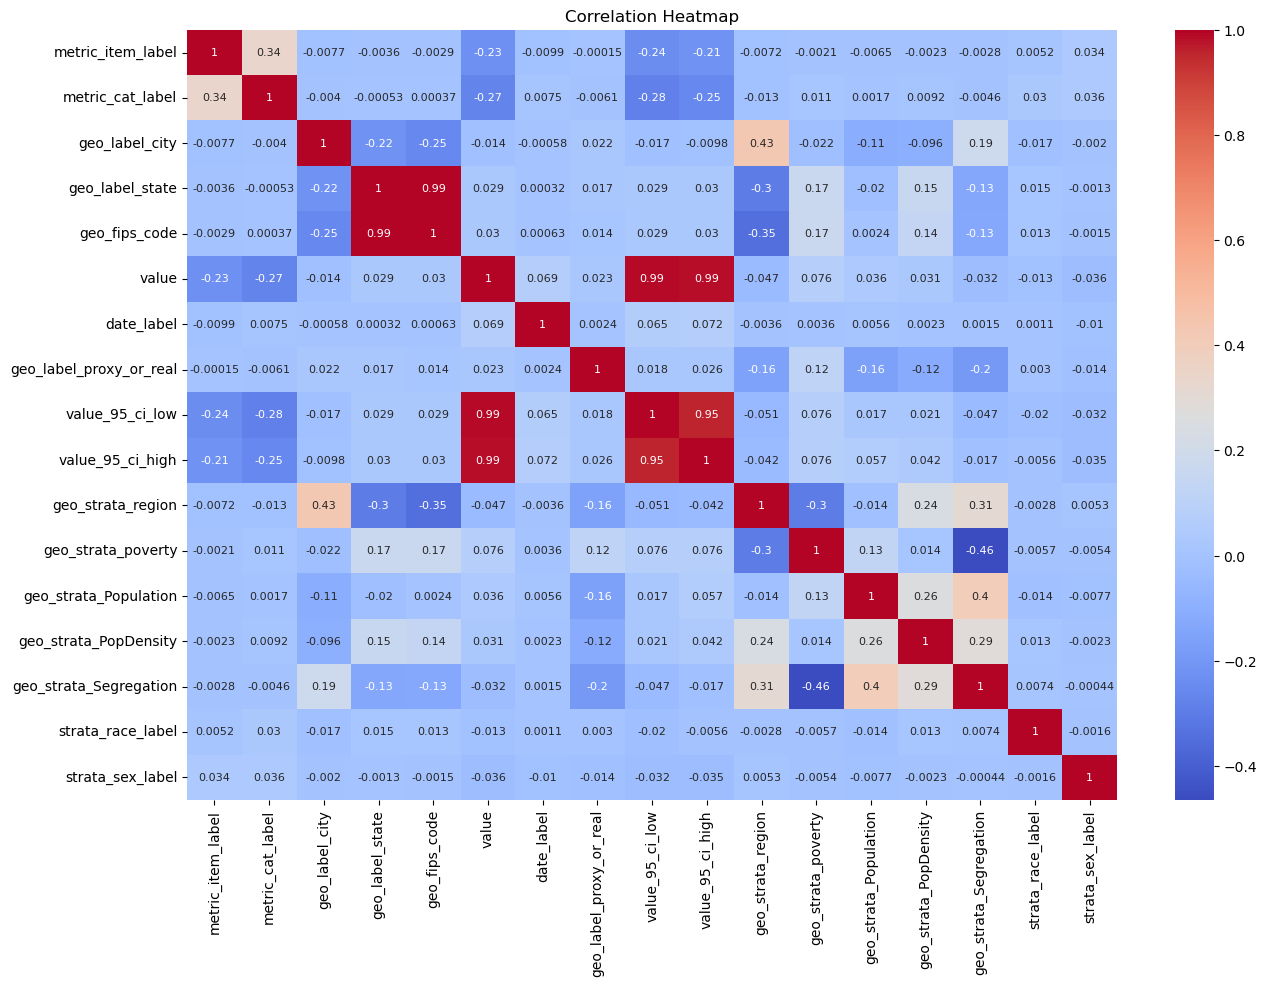

In [68]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Heatmap')

Oversample 'Infant Deaths' and 'Maternal Deaths', after noticing that there are less of it.

In [69]:
upsample_one = data[data['metric_item_label'] == 4].index
upasample_three = data[data['metric_item_label'] == 12].index

samples = 5

upsampled_1_indices = resample(upsample_one, n_samples=samples, replace=True, random_state=42)
upsampled_2_indices = resample(upasample_three, n_samples=samples, replace=True, random_state=42)

upsampled_indices = np.concatenate((upsampled_1_indices, upsampled_2_indices))

upsampled_data = data.copy()

data = upsampled_data.drop(upsampled_indices)


To reduce the computational work, we will sample the dataset to 10'000 columns

In [70]:
data = data.sample(n=25000, random_state=42)


In [71]:
data.to_csv('data.csv', index=False)

In [72]:
data = pd.read_csv('data.csv')
data

,metric_item_label,metric_cat_label,geo_label_city,geo_label_state,geo_fips_code,value,date_label,geo_label_proxy_or_real,value_95_ci_low,value_95_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label
0,5.0,4.0,2.0,7.0,2507.0,0.000086,2012.0,1.0,0.000070,0.000107,1.0,0.0,1.0,0.0,1.0,0.0,2.0
1,6.0,1.0,22.0,14.0,3651.0,0.000039,2013.0,1.0,0.000035,0.000042,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,0.0,20.0,22.0,5553.0,0.001303,2013.0,1.0,0.000791,0.002070,0.0,1.0,1.0,1.0,0.0,1.0,0.0
3,4.0,3.0,26.0,0.0,455.0,0.000151,2017.0,1.0,0.000136,0.000168,3.0,0.0,0.0,1.0,1.0,0.0,1.0
4,2.0,0.0,32.0,21.0,5363.0,0.001501,2012.0,1.0,0.000947,0.002354,3.0,0.0,1.0,1.0,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,12.0,4.0,2.0,7.0,2507.0,0.000060,2015.0,1.0,0.000045,0.000081,1.0,0.0,1.0,0.0,1.0,0.0,2.0
24996,2.0,0.0,1.0,8.0,2404.0,0.002903,2017.0,1.0,0.002826,0.002981,2.0,1.0,1.0,1.0,0.0,0.0,0.0
24997,5.0,4.0,0.0,20.0,4805.0,0.000156,2019.0,1.0,0.000128,0.000190,2.0,0.0,1.0,1.0,1.0,4.0,2.0
24998,2.0,0.0,9.0,9.0,2622.0,0.003598,2015.0,1.0,0.003516,0.003682,0.0,1.0,1.0,1.0,0.0,0.0,0.0
